Activity: Implement tanh and Relu Activation fucntion and compare the performance of the three actioviation function viz signmoid, tanh and Relu

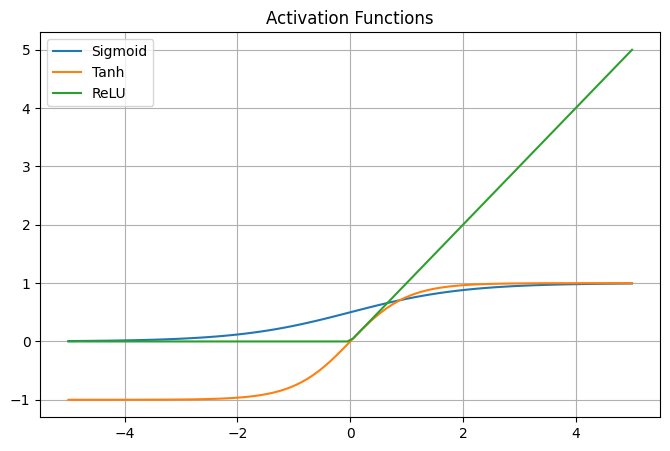

Activation: logistic - Accuracy: 0.9778
Activation: tanh - Accuracy: 0.9750
Activation: relu - Accuracy: 0.9806


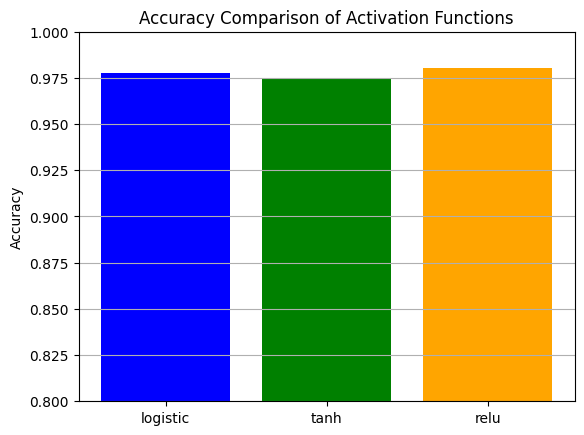

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Define activation functions manually (for understanding)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Plot them for visualization
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(8, 5))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')
plt.legend()
plt.title("Activation Functions")
plt.grid(True)
plt.show()

# 2. Load dataset and preprocess
digits = load_digits()
X = digits.data
y = digits.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train MLPClassifier with different activation functions
activations = ['logistic', 'tanh', 'relu']  # logistic = sigmoid
results = {}

for act in activations:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation=act, max_iter=500, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[act] = acc
    print(f"Activation: {act} - Accuracy: {acc:.4f}")

# 4. Plot comparison
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.title("Accuracy Comparison of Activation Functions")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.show()


## Observation:

The ReLU activation function gave the highest accuracy of **0.9806,** showing its strength in faster convergence and better performance for this classification task.

The Sigmoid (logistic) function performed slightly lower with 0.9778 accuracy, but still showed reliable results despite potential vanishing gradient issues.

The Tanh function resulted in 0.9750 accuracy, performing marginally below the others, but still suitable for learning centered data due to its symmetric output.